Step 1: Importing Libraries


In [1]:
# Importing necessary libraries for data manipulation, visualization, and modeling
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Suppress any warnings for cleaner output
warnings.filterwarnings('ignore')

Step 2: Loading Dataset


In [2]:
# Loading the Iris dataset from a CSV file
iris_data = pd.read_csv(r'C:\Users\shyam\OneDrive\Desktop\cipher byte\Task1-IRIS\Iris Flower - Iris.csv')

In [3]:

# Displaying the first few rows of the dataset
print(iris_data.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [4]:

# Dropping the 'Id' column as it is not necessary for analysis
iris_data = iris_data.drop(columns=['Id'])

Step 3: Dataset Statistics


In [5]:
# Displaying the statistical summary of the dataset
print(iris_data.describe())


       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     150.000000    150.000000     150.000000    150.000000
mean        5.843333      3.054000       3.758667      1.198667
std         0.828066      0.433594       1.764420      0.763161
min         4.300000      2.000000       1.000000      0.100000
25%         5.100000      2.800000       1.600000      0.300000
50%         5.800000      3.000000       4.350000      1.300000
75%         6.400000      3.300000       5.100000      1.800000
max         7.900000      4.400000       6.900000      2.500000


Step 4: Dataset Information


In [6]:
# Displaying the information about the dataset
print(iris_data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


Step 5: Value Counts of Target Variable


In [7]:
# Counting the number of occurrences of each species
print(iris_data['Species'].value_counts())



Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


Step 6: Dataset Shape


In [8]:
# Displaying the shape of the dataset
print(iris_data.shape)


(150, 5)


Step 7: Check for Missing Values

In [9]:
# Checking for any missing values in the dataset
print(iris_data.isnull().sum())


SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


Step 8: Exploratory Data Analysis (EDA)


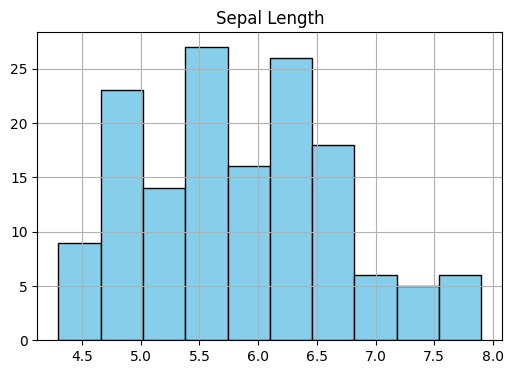

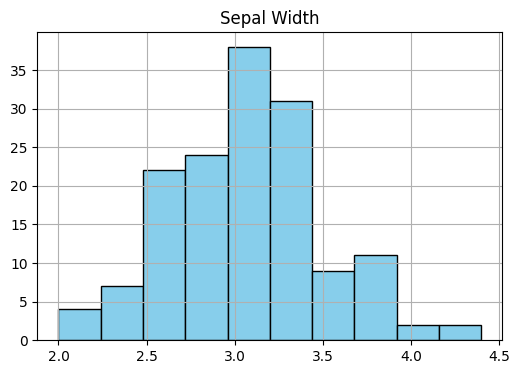

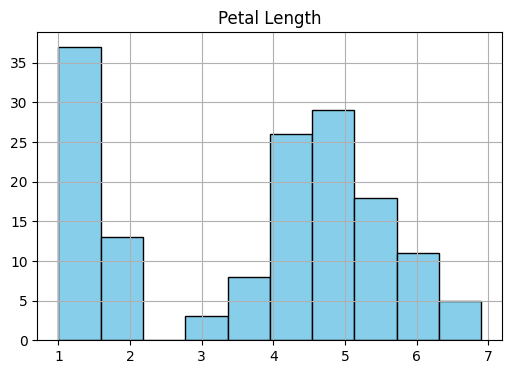

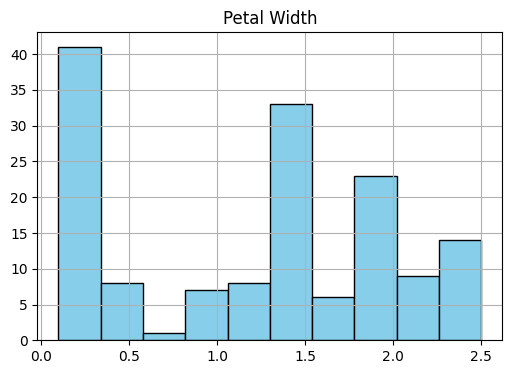

In [10]:
# Plotting histograms for each feature
plt.figure(figsize=(6, 4))
iris_data['SepalLengthCm'].hist(color='skyblue', edgecolor='black')
plt.title('Sepal Length')
plt.show()

plt.figure(figsize=(6, 4))
iris_data['SepalWidthCm'].hist(color='skyblue', edgecolor='black')
plt.title('Sepal Width')
plt.show()

plt.figure(figsize=(6, 4))
iris_data['PetalLengthCm'].hist(color='skyblue', edgecolor='black')
plt.title('Petal Length')
plt.show()

plt.figure(figsize=(6, 4))
iris_data['PetalWidthCm'].hist(color='skyblue', edgecolor='black')
plt.title('Petal Width')
plt.show()


Step 9: Scatter Plots for Feature Relationships

In [11]:
# Scatter plots to show relationships between features
colors = ['black', 'red', 'blue']
species = ['Iris-virginica', 'Iris-versicolor', 'Iris-setosa']

plt.figure()
for i in range(3):
    subset = iris_data[iris_data['Species'] == species[i]]
    plt.scatter(subset['SepalLengthCm'], subset['SepalWidthCm'], color=colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()
plt.title('Sepal Length vs Sepal Width')
plt.show()

plt.figure()
for i in range(3):
    subset = iris_data[iris_data['Species'] == species[i]]
    plt.scatter(subset['PetalLengthCm'], subset['PetalWidthCm'], color=colors[i], label=species[i])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()
plt.title('Petal Length vs Petal Width')
plt.show()

plt.figure()
for i in range(3):
    subset = iris_data[iris_data['Species'] == species[i]]
    plt.scatter(subset['SepalLengthCm'], subset['PetalLengthCm'], color=colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.legend()
plt.title('Sepal Length vs Petal Length')
plt.show()

plt.figure()
for i in range(3):
    subset = iris_data[iris_data['Species'] == species[i]]
    plt.scatter(subset['SepalWidthCm'], subset['PetalWidthCm'], color=colors[i], label=species[i])
plt.xlabel("Sepal Width")
plt.ylabel("Petal Width")
plt.legend()
plt.title('Sepal Width vs Petal Width')
plt.show()


KeyboardInterrupt: 

Step 10: Pairplot for Visualizing Relationships

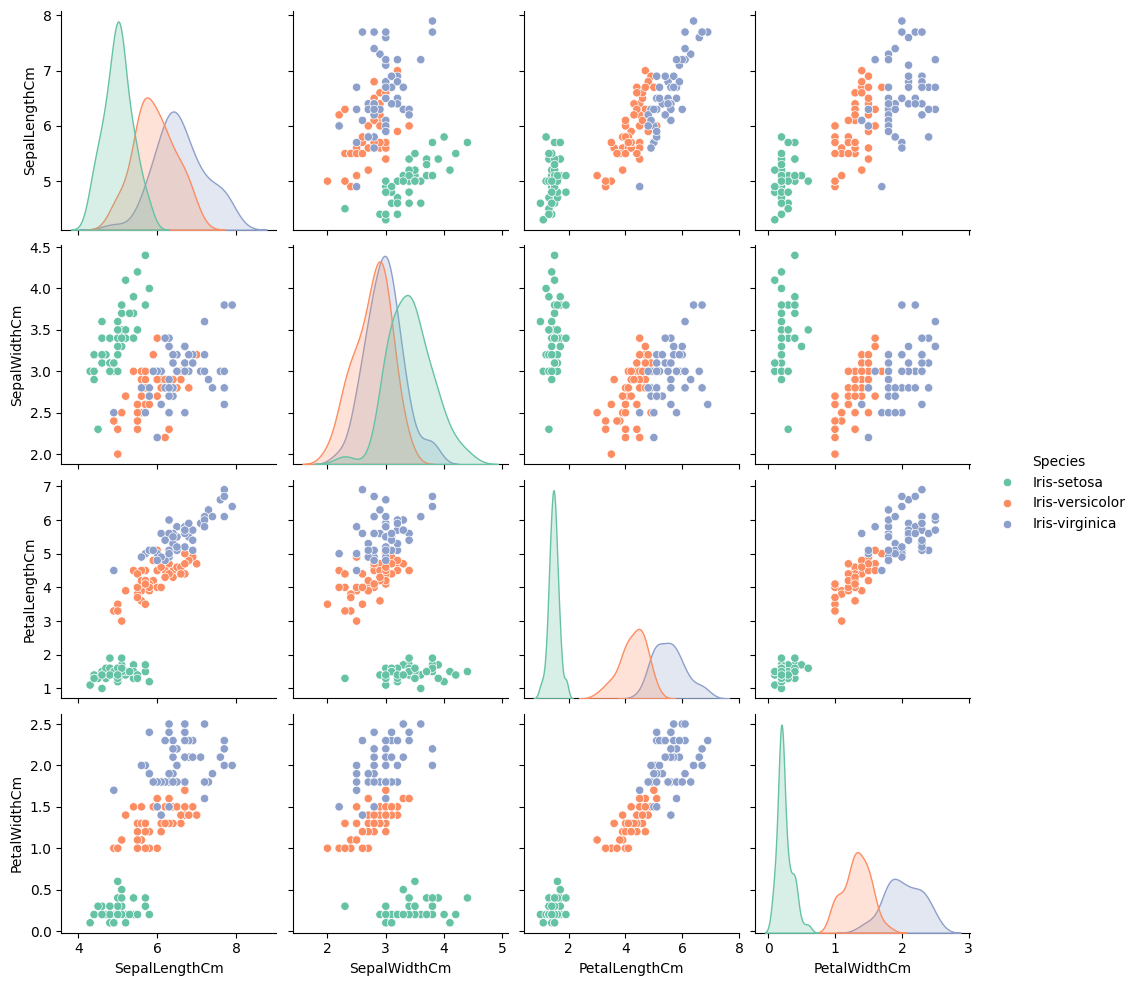

In [ ]:
# Using seaborn to create pairplots to visualize relationships between features
sns.pairplot(iris_data, hue='Species', palette='Set2')
plt.show()


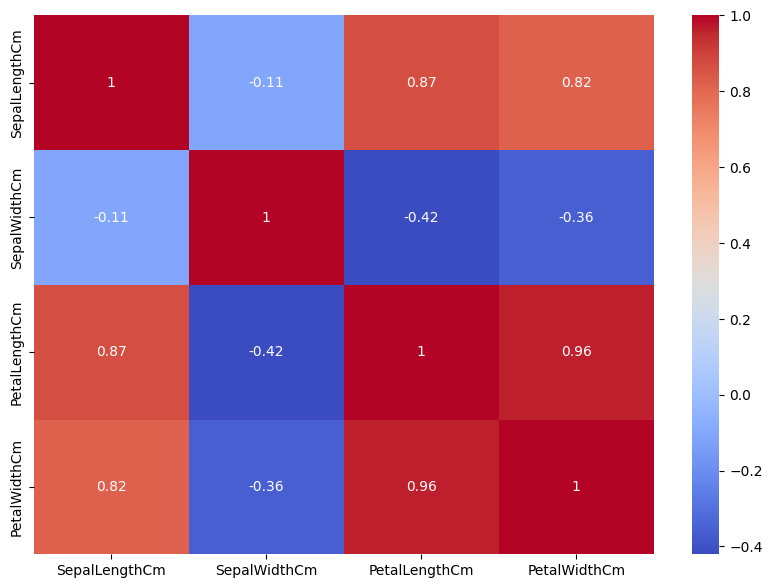

In [ ]:
# Correlation matrix
plt.figure(figsize=(10, 7))
sns.heatmap(iris_data.drop('Species', axis=1).corr(), annot=True, cmap='coolwarm')
plt.show()

Step 11: Training the Model

In [ ]:
# Separating the dataset into features and labels
X = iris_data.iloc[:,0:4].values
y = iris_data.iloc[:,4].values

In [ ]:

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [ ]:
#  Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=12)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))
print('Accuracy: {:.2f}%'.format(accuracy_score(y_test, y_pred_rf) * 100))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.88      1.00      0.93         7

       accuracy                           0.97        30
      macro avg       0.96      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30

[[10  0  0]
 [ 0 12  1]
 [ 0  0  7]]
Accuracy: 96.67%


In [ ]:
# Logistic Regression Model
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Making predictions and evaluating the model
y_pred_logreg = logreg.predict(X_test)

print(classification_report(y_test, y_pred_logreg))
print(confusion_matrix(y_test, y_pred_logreg))
print('Accuracy: {:.2f}%'.format(accuracy_score(y_test, y_pred_logreg) * 100))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         7

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

[[10  0  0]
 [ 0 13  0]
 [ 0  0  7]]
Accuracy: 100.00%


In [ ]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

# Making predictions and evaluating the model
y_pred_dt = dt_model.predict(X_test)

print(classification_report(y_test, y_pred_dt))
print(confusion_matrix(y_test, y_pred_dt))
print('Accuracy: {:.2f}%'.format(accuracy_score(y_test, y_pred_dt) * 100))


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.88      1.00      0.93         7

       accuracy                           0.97        30
      macro avg       0.96      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30

[[10  0  0]
 [ 0 12  1]
 [ 0  0  7]]
Accuracy: 96.67%


In [ ]:
# K-Nearest Neighbors Classifier
from sklearn.neighbors import KNeighborsClassifier

knn= KNeighborsClassifier()
knn.fit(X_train, y_train)

# Making predictions and evaluating the model
y_pred_knn = knn.predict(X_test)
print(classification_report(y_test, y_pred_knn))
print(confusion_matrix(y_test, y_pred_knn))
print('Accuracy: {:.2f}%'.format(accuracy_score(y_test, y_pred_knn) * 100))


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.88      1.00      0.93         7

       accuracy                           0.97        30
      macro avg       0.96      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30

[[10  0  0]
 [ 0 12  1]
 [ 0  0  7]]
Accuracy: 96.67%


Step 12: Prediction for New Data

In [ ]:
def predict_species(model, features):
    prediction = model.predict([features])
    return prediction[0]

print("enter the measurements of the new Iris flower:")

sepal_len = float(input("Enter Sepal Length: "))
sepal_wid = float(input("Enter Sepal Width: "))
petal_len = float(input("Enter Petal Length: "))
petal_wid = float(input("Enter Petal Width: "))

new = [sepal_len, sepal_wid, petal_len, petal_wid]

pred_log = predict_species(logreg, new)
print(f"The predicted species using Logistic Regression is: {pred_log}")

pred_dt = predict_species(dt_model, new)
print(f"The predicted species using Decision Tree is: {pred_dt}")

pred_knn = predict_species(knn, new)
print(f"The predicted species using KNN is: {pred_knn}")

pred_rf = predict_species(rf_model, new)
print(f"The predicted species using Random Forest is: {pred_rf}")

enter the measurements of the new Iris flower:
The predicted species using Logistic Regression is: Iris-setosa
The predicted species using Decision Tree is: Iris-virginica
The predicted species using KNN is: Iris-setosa
The predicted species using Random Forest is: Iris-versicolor


In [ ]:
import pickle
file_name='saved_model.sav'
pickle.dump(knn,open(file_name,'wb'))

In [ ]:
#save the model
import pickle
file_name = 'saved_model.sav'
pickle.dump(knn,open(file_name,'wb'))

In [ ]:
pickle.load(open(file_name,'rb')).predict([(1.2,3.1,4.1,2.1)])


array(['Iris-versicolor'], dtype=object)